In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks

imports work


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [2]:
run_number = "1101"

hit_data = rf.get_ROOT_data_zip(f"TB_FIRE_{run_number}_hits.root")

TB_FIRE_1101_hits.root finished


<span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes

In [3]:
# rf.hits_amount_colormap_single_plane(hit_data, 7)

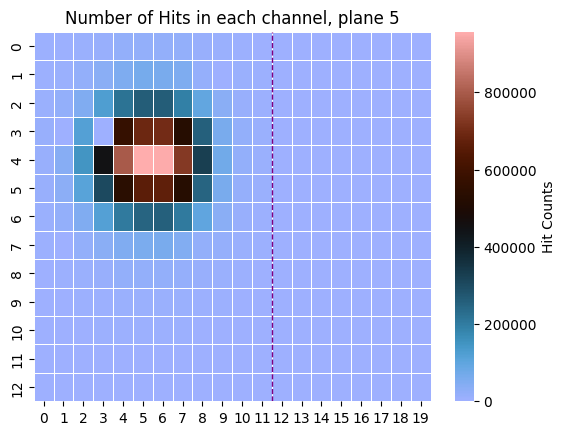

In [ ]:
rf.hits_amount_colormap_single_plane(hit_data, 0)

<span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor

In [17]:
# rf.single_event_evolution_amp(hit_data, 1504132, cmap="managua")


In [6]:
# plt.clf()   # Clear the current figure
# plt.close() # Close any open figures
# %matplotlib widget
# rf.amp_histo_single_plane(hit_data_1101,1)

In [7]:
# rf.amp_histo_single_plane_total_event(hit_data,0)

amount of hits in plane 0: 2154539
amount of hits in plane 1: 2267642
amount of hits in plane 2: 2299936
amount of hits in plane 3: 2305207
amount of hits in plane 4: 287522
amount of hits in plane 5: 2339654
amount of hits in plane 6: 2333522
amount of hits in plane 7: 2347161


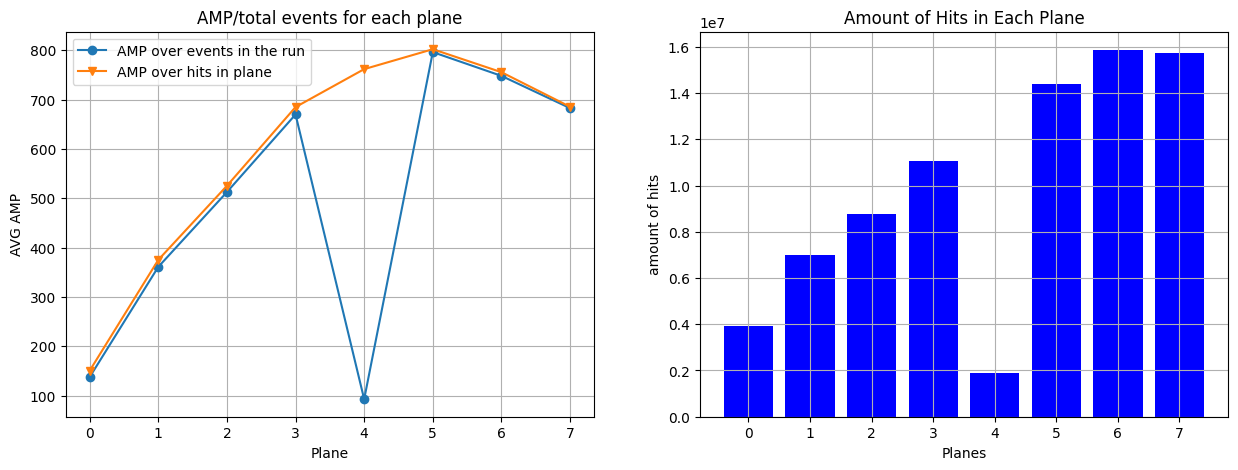

In [5]:
rf.average_amp_vs_plane(hit_data)

In [9]:
# rf.plot_empty_first_planes(hit_data)

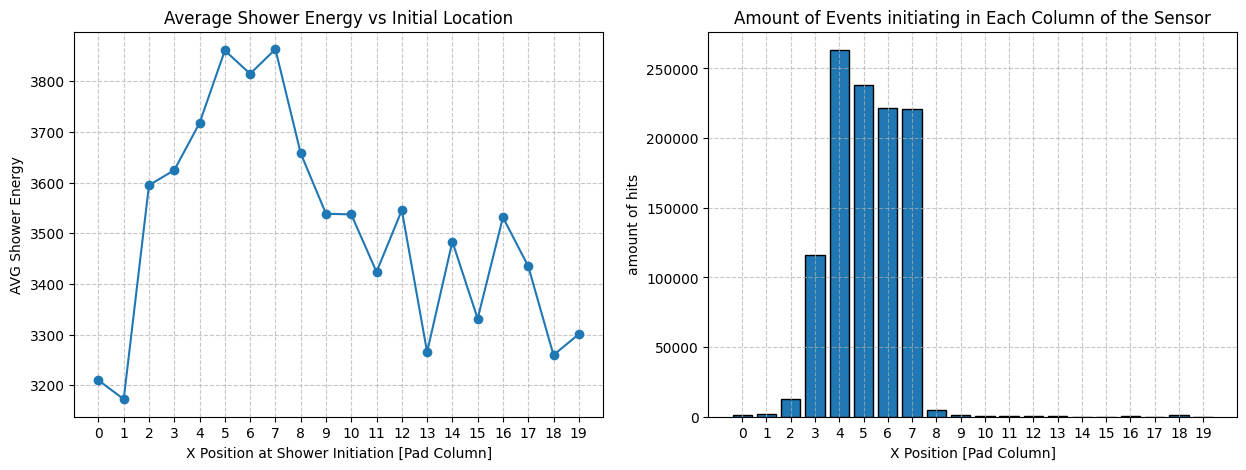

In [6]:
rf.event_shower_energy_vs_X_position(hit_data, single_pad_only = "true")

In [5]:



# # determine the initial position of the shower (x,y)
# def initial_X_position_DUT(hit_data, return_y = "false"):
    
#     # get only showers starting at the first plane
#     plane_7 = hit_data[hit_data.plane == 7]
#     mask = ak.num(plane_7) == 1

#     # get the channels data of the first plane
#     plane_7_clean = plane_7[mask]
#     plane_7_channel = plane_7_clean.ch
    
#     # convert to x, y positions
#     y, x = divmod(plane_7_channel, 20) #y is the quontinent and is the row, x is the remainder and column
    
#     # take the average of the X positions
#     x_list = x.to_list()
#     x_ak = ak.Array(x_list)
#     x_avg = ak.mean(x_ak, axis = 1)

#     # take the average of the Y positions
#     if return_y == "true":
#         y_list = y.to_list()
#         y_ak = ak.Array(y_list)
#         y_avg = ak.mean(y_ak, axis = 1)
#         return x_avg, y_avg

#     else:
#         return x_avg



# # average ENERGY in a shower vs columns and planes
# def avg_ENERGY_vs_plane_per_X_position(hit_data, number_of_highest_ocupied_columns, print_energies = "false"):
    
#     planes = np.arange(0,8)

#     # attach the positions to the data
#     positions = initial_X_position_DUT(hit_data)
#     plane_7 = hit_data[hit_data.plane == 7]
#     mask = ak.num(plane_7) == 1
#     events_starting_at_7 = hit_data[mask]

#     hit_data_positions = ak.zip({ "hits":events_starting_at_7, "positions":positions},depth_limit=1)
    
#     # get the most ocupied columns
#     top_columns = rf.columns_with_max_hits(hit_data, number_of_highest_ocupied_columns)
#     top_columns = np.sort(top_columns)
#     print(top_columns)

#     # array to store all the data of planes per column
#     total_avg_energy_planes = []

#     # create to plot figure
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     for column in top_columns:
#         print(column)
#         # creat an array to store the average ENERGY in each plane
#         energy_plane_array = []

#         # get the data of events initiating in the wanted column
#         hit_data_column = hit_data_positions[(hit_data_positions.positions >= column) & (hit_data_positions.positions < column + 1)]


#         # find the amount of hits in a plane for the column and add to the array
#         for plane in planes:
#             plane = 7-plane #adjust index so the first plane is 0
#             hit_data_column_plane = hit_data_column.hits[hit_data_column.hits.plane == plane] # the events initiatin at the wanted column and a specific plane 
#             hit_data_column_plane = hit_data_column_plane[ak.num(hit_data_column_plane) > 0] # clean from empty entries
#             num_of_events_column_plane = len(hit_data_column_plane)
#             energy_column_plane = ak.sum(hit_data_column_plane.amp)
#             avg_shower_energy_of_event_column_plane = energy_column_plane / num_of_events_column_plane
#             energy_plane_array.append(avg_shower_energy_of_event_column_plane)

#         #  add the array of energies for a single column to the total data array.
#         total_avg_energy_planes.append(energy_plane_array)
        
#         # print the energies per plane if needed
#         if print_energies == "true":
#             print(energy_plane_array)

#         # plot avg amount of hits per plane
#         ax1.plot(planes, energy_plane_array, label=f"X Position: {column} Column", marker=".")
#         ax1.grid(True, linestyle="--", alpha=0.7)
#         ax1.set_xlabel("Plane")
#         ax1.set_ylabel("Average Shower Energy")
#         ax1.set_title("Energy Distribution in the Sensor for Differrnt Columns")
#         ax1.legend()

    
#     # plot avg amount of hits per position
#     total_avg_energy_columns = np.transpose(np.array(total_avg_energy_planes))
#     for plane in planes:
#         avg_energy_plane_column = total_avg_energy_columns[plane]
#         ax2.plot(top_columns, avg_energy_plane_column, label = f"Plane: {plane}", marker="D")
#         ax2.set_xlabel('Column')
#         ax2.set_ylabel('Average Shower Energy')
#         ax2.set_title('Plane Energy in Each Column')
#         ax2.grid(True)
#         ax2.legend()

#     fig.suptitle("Average Shower Energy for Different Planes, for Events Initiating in Different Positions", fontsize=14)
#     plt.show()


[2 3 4 5 6 7]
2
3
4
5
6
7


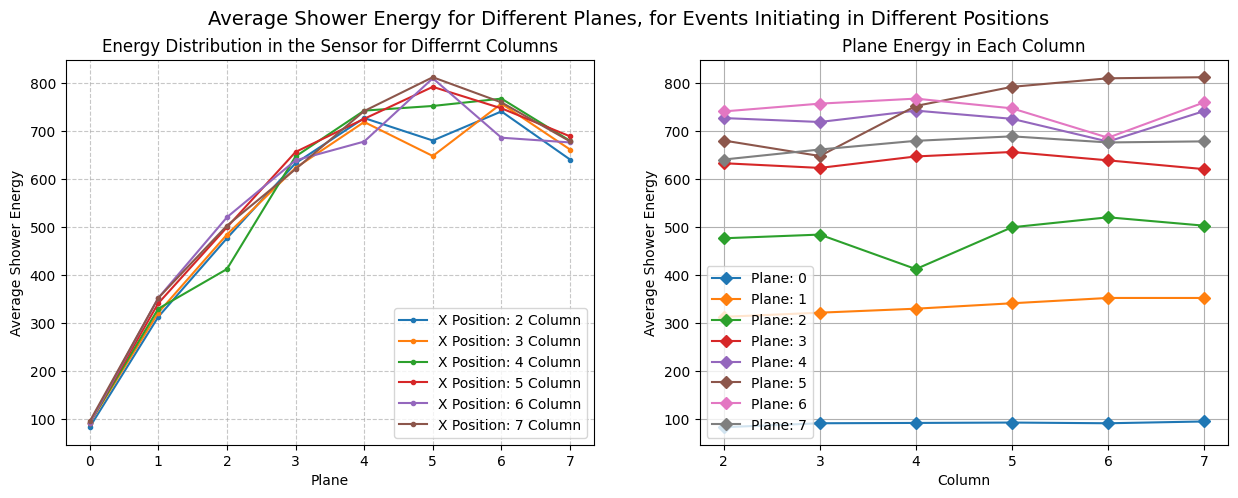

In [7]:
rf.avg_ENERGY_vs_plane_per_X_position(hit_data,6)

2 13042
########
3 116440
########
4 263237
########
5 238416
########
6 221755
########
7 220714
########


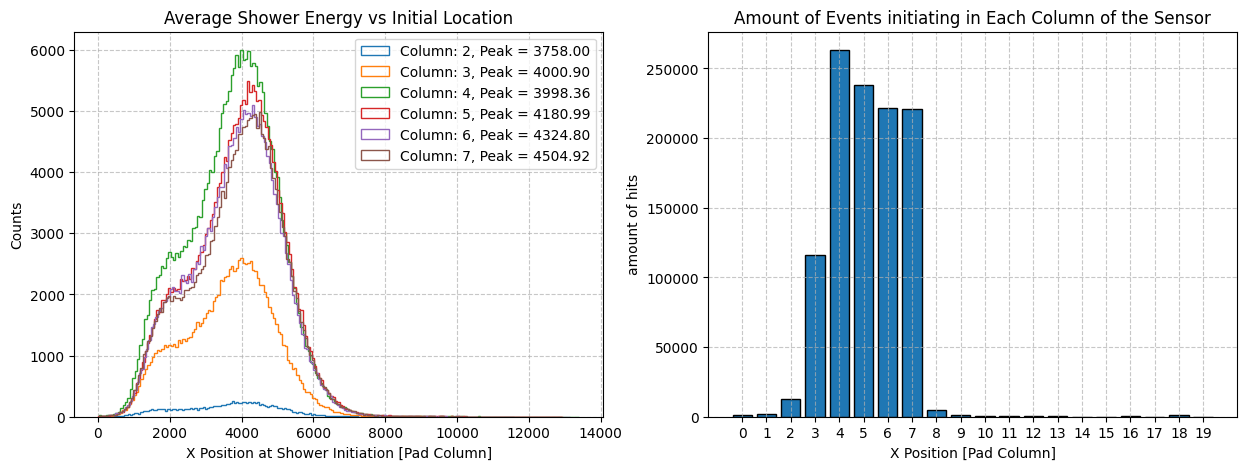

In [3]:
rf.Histo_shower_energy_for_X_position(hit_data, 6, single_pad_only = "true")